Documentación original: "Aprende Machine Learning con Scikit-Learn, Keras y Tensorflow" Aurélien Géron

En este ejemplo de aprendizaje basado en modelos queremos saber si el dinero hace más feliz a la gente
Basado en los datos del índice para una vida mejor de OCDE y estadísticas del Banco Mundial sobre el producto interior bruto (PIB)

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

Scikit-Learn ≥1.0.1 is required:

In [3]:
from packaging import version
import sklearn  
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Let's define the default font sizes, to plot pretty figures:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Make this notebook's output stable across runs:

In [5]:
import numpy as np

np.random.seed(42)

El siguiente bloque nos sirve para ver cual es el flujo de trabajo básico en un proyecto.

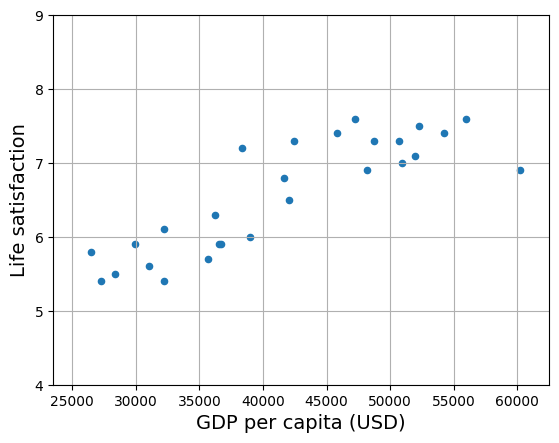

[[6.30165767]]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression  #escoge el modelo de regresión lineal

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values #PIB per capita,  características
y = lifesat[["Life satisfaction"]].values  #índice para una vida mejor obtenida de la OCDE, etiquetas

# Visualiza los datos con un diagrama
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Seleccionamos un modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X, y)

# Hace una predicción para Cyprus
X_new = [[37_655.2]]  # Cyprus' PIB per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]  Esto es la inferencia

Vamos a utilizar un modelo de regresión lineal

Aquí el entrenamiento se hace con todos los datos y luego se infiere introduciendo un dato nuevo. Más adelante tendremos 2 conjuntos de datos: entrenamiento y prueba.

Podemos probar con otro modelo de los K-Nearest Neighbors(KNN, en este caso k=3) , aunque sirve para problemas de regresión, este algoritmo suele usarse más en clasificación. Aquí se muestra para ver cómo se cambiaría de modelo. Recordemos que es un algoritmo basado en instancias.

Reemplazando:


```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

por:

```python
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
```

In [23]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new)) # outputs [[6.33333333]]


[[6.33333333]]


## ¿Cómo llegamos hasta aquí?
## Lo primero preparando los datos 

Lifesat.csv se creó a partir de los datos de 2 fuentes: gdp_per_capita.csv y oecd_bli.csv

Nos quedamos con los datos GDP per capita solo del año 2020:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data_root = "https://github.com/ageron/data/raw/main/lifesat/"
gdp_per_capita = pd.read_csv(data_root + "gdp_per_capita.csv")
oecd_bli = pd.read_csv(data_root + "oecd_bli.csv")


gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"


gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year].copy()
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


En el caso de OECD BLI nos quedamos solo con la columna `Life satisfaction`

In [8]:

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [9]:

oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


Ahora los combinamos, manteniendo solo las columnas PIB per cápita(GDP) y life satisfaction:

In [12]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)    #así nuestro join considera los índices 
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


To illustrate the risk of overfitting(sobreajuste), I use only part of the data in most figures (all countries with a GDP per capita between `min_gdp` and `max_gdp`). Later in the chapter I reveal the missing countries, and show that they don't follow the same linear trend at all.

In [14]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [15]:
country_stats.to_csv("lifesat.csv")
full_country_stats.to_csv("lifesat_full.csv")

Vemos los datos para algunos países para ver si hay una tendencia...

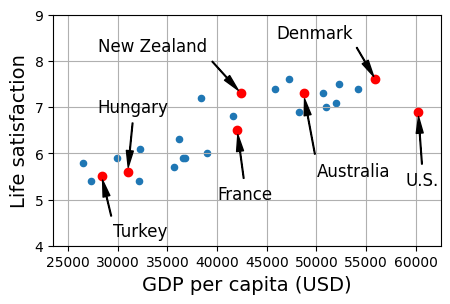

In [17]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])


plt.show()

In [18]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


Si observamos los datos parece que hay una tendencia, parece que la satisfacción vital sube más o menos de **forma lineal** a medida que aumenta el PIB. Acabamos de seleccionar el modelo: un modelo lineal con solo un atributo, el PIB.

$$satisfaccionvital=\theta_0 + \theta_1 \times PIB$$

Esos 2 parámetros del modelo son los que al ir ajustándolos podemos hacer que represente cualquier función lineal. 
Y para saber cuáles son los que harán que el modelo tenga mejor rendimiento, primero definimos una función de utilidad que mida lo bueno que es nuestro modelo o una función de pérdida que mida lo malo que es. Para los problemas de regresión lineal, se suele utilizar una función de pérdida que mide la distancia entre las predicciones del modelo lineal y los ejemplos de entrenamiento, el objetivo es minimizar esa distancia.
Ahora mostramos en la gráfica diferentes valores para esos parámetros que representaría el **entrenamiento** del modelo

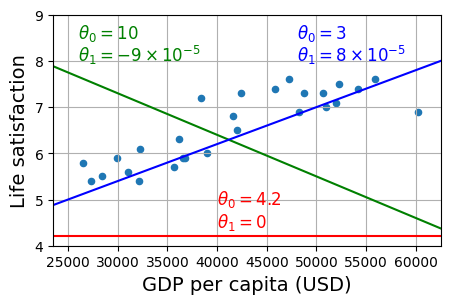

In [19]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)  #mil puntos igualmente espaciados en ese rango

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])


plt.show()

El **entrenamiento**: le introducimos nuestros ejemplos de entrenamiento y el modelo encuentra los parámetros que hacen que el modelo lineal se ajuste mejor a nuestros datos y que con suerte hará buenas predicciones en datos nuevos.

Una vez entrenado el modelo se obtienen los valores con intercept_ es y con .coef_[][]. En este caso:

t0= lin1.intercept_[0] es el término independiente de la recta , en modelos estándar de regresión lineal solo hay un intercepto : [0]

t1 = lin1.coef_[0][0]  contiene los coeficientes de la regresión, que son los que indican la pendiente de la recta de regresión. Como en este caso es una regresión simple, solo tenemos una lista y con [0][0] obtenemos el primer y único coeficiente en una regresión simple.

In [21]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()  
lin1.fit(X_sample, y_sample)   #entrenamos con los valores que tenemos
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
  
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


Ahora ponemos esos valores en la gráfica

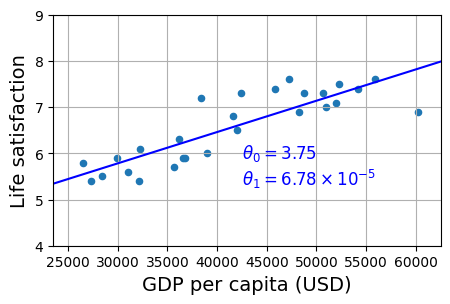

In [22]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])


plt.show()

Ahora el modelo sí se ajusta a los datos de entrenamiento lo máximo posible. 

## Ahora ya podemos empezar a hacer predicciones
Conocemos el PIB de los chipriotas

In [23]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

np.float64(37655.1803457421)

Pero no tenemos predicción de lo felices que son así que vamos a realizar una predicción con nuestro modelo

Fíjate que .predict recibe como entrada una matriz de características y el resultado también es una matriz bidimensional y accedemos al valor en este caso con [0][0] (el primero y único valor)

In [24]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]   #predicción sobre el modelo entrenado
cyprus_predicted_life_satisfaction

np.float64(6.301656332738056)

Lo mostramos en un gráfico

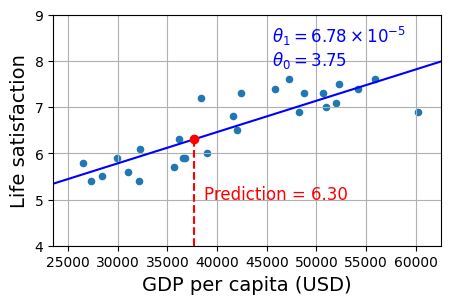

In [25]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

Pero si recordamos, utilizamos un conjunto de entrenamiento en el que no estaban representados ni los países muy ricos ni los muy pobres. Para que no se produzca sesgo muestral vamos a ver qué ocurriría con los datos que faltaban.

In [26]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [27]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

Vamos a entrenarlo teniendo en cuenta esos datos

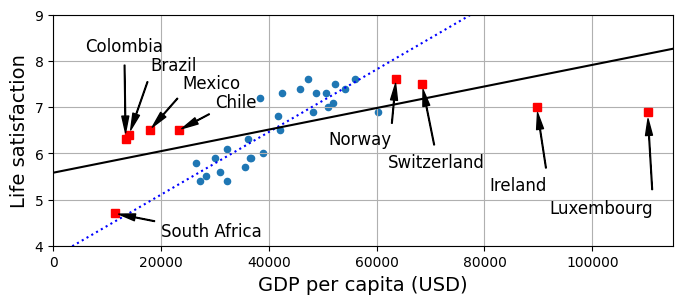

In [28]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = full_country_stats[[gdppc_col]] 
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])


plt.show()

Con la línea de puntos vemos el modelo entrenado antes y con la línea negra el entrenado con los nuevos datos. Ha cambiado significativamente al tener en cuenta los nuevos datos, así que el antiguo no iba a funcionar bien. Por eso, es muy importante tener un conjunto de entrenamiento que sea representativo para los casos que queremos generalizar. 

## Sobreajustar los datos de entrenamiento

Vamos a suponer ahora que utilizamos un modelo polinomial que utiliza un grado muy alto y va a ocasionar sobreajuste (overfitting). 
El sobreajuste se produce cuando un modelo es demasiado complejo en relación con la cantidad de datos de entrenamiento (y ruido). Como soluciones tendremos:

- Simplificar el modelo con menos parámetros (mejor lineal que polinomial)
- Tener más datos de entrenamiento
- Solucionar errores en los datos y eliminar valores atípicos (ruido)

c:\Users\ralphy.nunezmercado\Documents\Directorio\InteligenciaArtificial\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


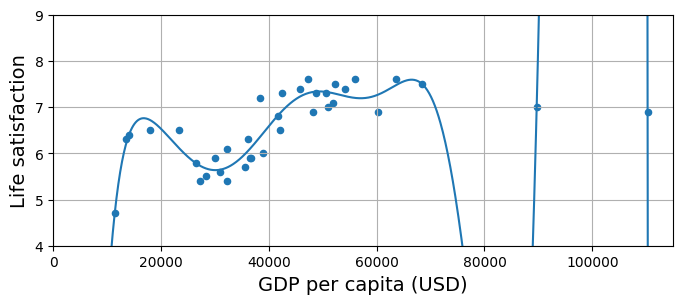

In [29]:
from sklearn import preprocessing  
from sklearn import pipeline   

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)  

scaler = preprocessing.StandardScaler()  #normaliza las características:las escala, recomendable en r. polinómica 

lin_reg2 = linear_model.LinearRegression() #modelo de regresión lineal

#este modelo se entrena con las características transformadas por el polinomio y escaladas, sirve
#en casos donde se sospecha que la relación entre características y etiquetas no es lineal y al realizar
#la transformación polinómica el modelo de regresión lineal puede captarla.

#pipeline:varios pasos de preprocesamiento y AA en un solo flujo de trabajo
pipeline_reg = pipeline.Pipeline([     
    ('poly', poly),      #transformación polinómica
    ('scal', scaler),    #escalado
    ('lin', lin_reg2)])  #aplicamos el modelo, en este caso, regresión lineal

pipeline_reg.fit(Xfull, yfull)   #entrenamiento del pipeline, aquí el pipeline realiza todos los pasos en orden
#en este caso transforma, escala y ajusta

curve = pipeline_reg.predict(X[:, np.newaxis]) #ahora realiza la predicción

#fíjate que utiliza X[:, np.newaxis] para convertir un vector en una matriz, porque predict espera 
#una matriz 2D y con np.newaxis añades una nueva dimensión(sin datos) 

plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])


plt.show()

Al utilizar así un modelo podría ocurrir que el modelo detectase que los países que tienen una W entre su nombre son más felices y está claro que no es un parámetro a tener en cuenta para saber la felicidad de la población. Pero claro, el modelo no puede saber si un patrón es real o simplemente hay ruido en los datos.

In [30]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [31]:
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

,GDP per capita (USD)
Country,
Malawi,1486.778248
Rwanda,2098.710362
Zimbabwe,2744.690758
Africa Western and Central,4003.158913
Papua New Guinea,4101.218882
Lower middle income,6722.809932
Eswatini,8392.717564
Low & middle income,10293.855325
Arab World,13753.707307


Restringir un modelo para hacer que sea más sencillo y reducir ese riesgo de sobreajuste se llama "**regularización**". Tenemos que encontrar el equilibrio entre ajustar los datos y mantener el modelo lo bastante simple para garantizar que va a ser capaz de generalizar bien.
En el siguiente gráfico vemos 3 modelos: el modelo original con línea discontinua (y puntos azules), con línea continua todos los países y un tercero con una restricción de regularización (en este caso obliga al modelo a tener una pendiente pequeña).

Vemos que el tercer modelo no se ajusta a los datos de entrenamiento (azules) del principio tan bien como el primer modelo, pero generaliza mejor a ejemplos nuevos (rojos) que no había visto en el entrenamiento.

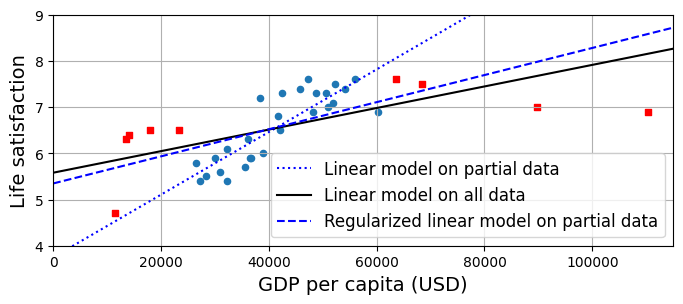

In [34]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)    #restricción de regularización
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge,t1ridge = ridge.intercept_[0], ridge.coef_

plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])


plt.show()

La cantidad de regularización que hay que aplicar durante el aprendizaje se puede controlar mediante un hiperparámetro. 
Un hiperparámetro es un parámetro de un algoritmo de aprendizaje; debe establecerse antes del entrenamiento y va a permanecer constante durante el mismo.
El ajustar hiperparámetros es una parte importante de la creación de un sistema de ML.


Y por supuesto, el subajuste se produce cuando el modelo es demasiado simple para aprender la estructura de los datos. Por ejemplo, ese modelo inicial lineal es propenso al subajuste, la realidad es más compleja que el modelo, así que seguramente sus predicciones serán inexactas.


## Probar y validar 

Quedaría ahora probar el modelo con casos nuevos, pero hacerlo en producción es peligroso. 

Evaluar el modelo es simple pero si dudamos entre más modelos lo que debemos hacer es entrenarlos y comparar cómo generalizan utilizando el conjunto de prueba. 

Es habitual utilizar el 80% de los datos para el entrenamiento y reservar el 20% para pruebas. Pero, como siempre, esto depende del tamaño del conjunto de datos. Si tenemos muchos, es posible bajar ese % de pruebas (90%,10%).